In [ ]:
# Google Drive와 마운트
from google.colab import drive
ROOT = '/content/drive'
drive.mount(ROOT)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Project Folder 연결
from os.path import join  

MY_GOOGLE_DRIVE_PATH = 'My Drive/Colab Notebooks/hkit_301/data'
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)
print(PROJECT_PATH)

/content/drive/My Drive/Colab Notebooks/hkit_301/data


In [ ]:
%cd "{PROJECT_PATH}"

/content/drive/My Drive/Colab Notebooks/hkit_301/data


In [ ]:
import pandas as pd
from pandas.io import gbq

# import submission file in Google Drive
submission = pd.read_csv('submission.csv')

# Connect to Google Cloud API and Upload DataFrame
submission.to_gbq(destination_table='jeju_data_ver1.submission', 
                  project_id='jeju-analy', 
                  if_exists='replace')

# import submission file in Google Drive
train = pd.read_csv('201901-202003.csv')

# Connect to Google Cloud API and Upload DataFrame
train.to_gbq(destination_table='jeju_data_ver1.201901_202003_train', 
                  project_id='jeju-analy', 
                  if_exists='replace')

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=725825577420-unm2gnkiprugilg743tkbig250f4sfsj.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=lY5sXefaruSy6qBN6n5ZiudWhJOyIy&prompt=consent&access_type=offline
Enter the authorization code: 4/2AH4s1Cn5x3pyA4uXeg-MVibxLyT9mJDAsX0KzE2AmyYtd4RHtjw9Xw


1it [00:02,  2.68s/it]
1it [08:06, 486.94s/it]


In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 47.8MB 760kB/s
     |████████████████████████████████| 71kB 1.9MB/s 
     |████████████████████████████████| 61kB 3.0MB/s 
     |████████████████████████████████| 604kB 4.4MB/s 
     |████████████████████████████████| 3.1MB 7.8MB/s 
     |████████████████████████████████| 71kB 6.2MB/s 
     |████████████████████████████████| 296kB 25.5MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.9.0rc1-py2.py3-none-any.whl size=258106 sha256=8646d4e3a91fd31983d20e16e2d27e22a549b6e0ba3c659bca694bfc6358255b
  Stored in directory: /tmp/pip-ephem-wheel-cache-z7f55vns/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=eaadee1af5409e99f7f52cdf605dbc8d3ada5b6bb89c3c0a13cc5e8f9925fd24
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291

# XGboost 설치
- 설치방법은 여러가지가 있다. (Conda, Pypl)
- 자세한 내용은 설치가이드를 참조하기를 바란다.
- 다행히, Google Colab에서는 자유롭게 사용할 수 있다

In [ ]:
from xgboost import XGBRegressor
import xgboost
print(xgboost.__version__)

0.90


# XGboost 기본 실습
- 본 데이터에서 적용하기 전, 간단하게 회귀모형을 만들고 예측하는 코드를 작성한다.

In [ ]:
# 데이터셋 분리
from sklearn.model_selection import train_test_split

# 데이터 수집
from sklearn.datasets import load_boston

# 평가 메트릭
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 수집
boston = load_boston()
x, y = boston.data, boston.target

# 데이터 분리
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.15, random_state = 1)

xgb_reg = XGBRegressor(verbosity=0) 
print(xgb_reg)

xgb_reg.fit(X_train, y_train)
score = xgb_reg.score(X_train, y_train)  
print("Training score: ", score)

y_pred = xgb_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)
Training score:  0.9749120480780799
MSE: 7.22


# LightGBM 개요
- LightGBM과 XGBoost의 가장 큰 차이점은 연산속도이다.
- 기존의 GBM계열은 균형 트리 분할 방법(Level Wise)을 사용한다.
  - 기존 방식에서는 보통 균형 잡힌 트리(Level Wise)를 채택하는데, 그 이유는   - 오버피팅에 보다 더 강한 구조를 가질 수 있다고 알려져 있기 때문이다.
  - 그러나, 이는 시간이 더 많이 필요하다는 단점이 있다.
- LightGBM은 Leaf 중심 트리 분할 방식을 사용한다.
  - 트리의 균형을 맞추지 않고, 최대 손실 값(max delta loss)을 가지는 리프 노드를 지속적으로 분할한다.
  - 최대 손실값을 찾아서 리프 노드를 지속적으로 분할해 생성된 규칙 드리를 학습할수록 결국은 균형 트리 분할 방식보다 예측 오류 손실을 최소화 할 수 있다.
- 또 다른 특징은, GPU를 지원하고 있고, 병렬 컴퓨팅 기능을 제공하고 있다.
- 이는 대용량 데이터를 학습할 때, 보다 빠르게 학습시킬 수 있음을 의미한다.


# LightGBM 설치
- 설치방법은 OS마다 다르기 때문에 공식 설치 문서를 참조한다.
- 다행히 구글 Colab에서도 lightgbm을 사용할 수 있다.

In [ ]:
import lightgbm
from lightgbm import LGBMRegressor
print(lightgbm.__version__)

2.2.3


# LightGBM 실습
- 본 데이터에서 적용하기 전, 간단하게 회귀모형을 만들고 예측하는 코드를 작성한다.

In [ ]:
# 데이터셋 분리
from sklearn.model_selection import train_test_split

# 데이터 수집
from sklearn.datasets import load_boston

# 평가 메트릭
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 수집
boston = load_boston()
x, y = boston.data, boston.target

# 데이터 분리
X_training, X_testing, y_training, y_testing = train_test_split(x, y, test_size=0.15, random_state = 1)

lgb_reg = LGBMRegressor(verbosity=0) 
print(lgb_reg)

lgb_reg.fit(X_training, y_training)
score = lgb_reg.score(X_training, y_training)  
print("Training score: ", score)

y_pred = lgb_reg.predict(X_testing)
mse = mean_squared_error(y_testing, y_pred)
print("MSE: %.2f" % mse)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
              verbosity=0)
Training score:  0.9799082762820248
MSE: 9.44


# 스태킹(Stacking) 알고리즘
- D. H. Wolpert(1992)가 Stacked Generalization이름으로 처음 제안함

  - 그후 2015년에 Kaggle 대회에서 소개되면서 퍼지기 시작함
  - ref. https://wolpert.readthedocs.io/en/latest/user_guide/intro.html
- 개별적인 여러 알고리즘을 서로 결합해 예측 결과를 도출한다.

- 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행함

- 스태킹은 크게 두 종류의 모델이 필요함

  - 개별적인 기반 모델 (SVM, Randomforest, etc)
  - 개별 기반 모델의 예측 데이터를 학습 데이터로 만들어서 학습하는 최종 메타 모델
  - 스테킹 모델의 핵심은 여러 개별 모델의 예측 데이터를 각각 스태킹 형태로 결합 최종 메티 모델의 학습용 피처 데이터 세트와 테스트용 피처 데이터 세트를 만드는 것.
- 단, 현실 모델에 적용하는 많지 않으나, 캐글과 같은 대회에서는 자주 사용된다고 함.

  - 성능 수치를 올리는 것이 중요함

# 스태킹 알고리즘 개념 예제
- 간단한 예제를 통해 원리를 확인한다.
  - 소스코드 참조: 파이썬 머신러닝 가이드 (p.280)

In [ ]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_training , X_testing , y_training , y_testing = train_test_split(X_data , y_label , test_size=0.2 , random_state=0)

# 개별 ML 모델을 위한 Classifier 생성.
knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 최종 Stacking 모델을 위한 Classifier생성. 
lr_final = LogisticRegression(C=10)

# 개별 모델들을 학습. 
knn_clf.fit(X_training, y_training)
rf_clf.fit(X_training , y_training)
dt_clf.fit(X_training , y_training)
ada_clf.fit(X_training, y_training)

# 학습된 개별 모델들이 각자 반환하는 예측 데이터 셋을 생성하고 개별 모델의 정확도 측정. 
knn_pred = knn_clf.predict(X_testing)
rf_pred = rf_clf.predict(X_testing)
dt_pred = dt_clf.predict(X_testing)
ada_pred = ada_clf.predict(X_testing)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_testing, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_testing, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_testing, dt_pred)))
print('에이다부스트 정확도: {0:.4f} :'.format(accuracy_score(y_testing, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9123
에이다부스트 정확도: 0.9561 :


In [ ]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 컬럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦. 
pred = np.transpose(pred)
print(pred.shape)

lr_final.fit(pred, y_testing)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_testing , final)))

(4, 114)
(114, 4)
최종 메타 모델의 예측 정확도: 0.9737


- 분류 모형이지만, 최종 메타 모델의 예측 정확도가 보다 향상 된 것을 확인할 수 있다.
- 또 다른 예제는 Ensemble Prediction이라고 한다.

# III. 빅쿼리 연동
- 지난 시간에 데이콘에서 내려받은 데이터를 빅쿼리에 넣는 작업을 진행하였다.
- 빅쿼리에 저장된 데이터를 구글 코랩으로 불러오려면 다음과 같이 진행한다.

## (1) 사용자 계정 인증
구글 코랩을 사용해서 인증 절차를 밟도록 한다. 아래 소스코드는 변경시키지 않는다. 아래 절차대로 진행하면 된다. Gmail 인증 절차와 비슷하다.



In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
from google.cloud import bigquery
from tabulate import tabulate
import pandas as pd

project_id = 'jeju-analy'
client = bigquery.Client(project=project_id)

train = client.query('''
  SELECT 
    * 
  FROM `jeju-analy.jeju_data_ver1.201901_202003_train` 
  LIMIT 1000
  ''').to_dataframe()

print(train)

     REG_YYMM CARD_SIDO_NM CARD_CCG_NM  ... CSTMR_CNT     AMT CNT
0      201901           서울         서초구  ...         9   99200  28
1      201902           강원         강릉시  ...         3   14800   3
2      201902           강원         태백시  ...         3   33000   3
3      201902           강원         홍천군  ...        29  264260  47
4      201903           강원         강릉시  ...        17  127850  18
..        ...          ...         ...  ...       ...     ...  ..
995    202003           강원         원주시  ...        32  328250  35
996    202003           강원         인제군  ...         5   49700   7
997    202003           강원         태백시  ...         5   92800   9
998    201909           강원         동해시  ...         9   45570   9
999    201910           강원         강릉시  ...         3   25500   3

[1000 rows x 12 columns]


In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder

# 03 Chapter에서 추가
# 평가 메트릭
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 시각화
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt  # Matlab-style plotting

# 통계
from scipy import stats
from scipy.stats import norm, skew #for some statistics

# 06 Chapter 추가
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
print('Pandas : %s'%(pd.__version__))
print('Numpy : %s'%(np.__version__))
print('Scikit-Learn : %s'%(sklearn.__version__))
print('seaborn : %s'%(sns.__version__))
print('matplotlib : %s'%(matplotlib.__version__))
!python --version

Pandas : 1.0.5
Numpy : 1.18.5
Scikit-Learn : 0.22.2.post1
seaborn : 0.10.1
matplotlib : 3.2.2
Python 3.6.9


날짜 데이터 전처리
- 데이터 전처리 기본함수 작성
- 우선 날짜 처리를 먼저 진행한다.
  - year & month 로 구분

In [ ]:
def grap_year(data): # year 구분
  data = str(data)
  return int(data[:4])

def grap_month(data):
  data = str(data)
  return int(data[4:])

In [ ]:
# 날짜 처리
data = train.copy()
print(data)
data = data.fillna('') # Nan값을 바꿔줌. 빈값으로
print(data['REG_YYMM'].head(20)) 

     REG_YYMM CARD_SIDO_NM CARD_CCG_NM  ... CSTMR_CNT     AMT CNT
0      201901           서울         서초구  ...         9   99200  28
1      201902           강원         강릉시  ...         3   14800   3
2      201902           강원         태백시  ...         3   33000   3
3      201902           강원         홍천군  ...        29  264260  47
4      201903           강원         강릉시  ...        17  127850  18
..        ...          ...         ...  ...       ...     ...  ..
995    202003           강원         원주시  ...        32  328250  35
996    202003           강원         인제군  ...         5   49700   7
997    202003           강원         태백시  ...         5   92800   9
998    201909           강원         동해시  ...         9   45570   9
999    201910           강원         강릉시  ...         3   25500   3

[1000 rows x 12 columns]
0     201901
1     201902
2     201902
3     201902
4     201903
5     201904
6     201905
7     201906
8     201907
9     201907
10    201901
11    201903
12    201903
13    201903


In [ ]:
data['year'] = data['REG_YYMM'].apply(lambda x: grap_year(x))
data['month'] = data['REG_YYMM'].apply(lambda x: grap_month(x))
data = data.drop(['REG_YYMM'], axis=1)
data.head()

,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,year,month
0,서울,서초구,버스 운송업,강원,화천군,10s,2,1,9,99200,28,2019,1
1,강원,강릉시,비알콜 음료점업,강원,원주시,10s,2,1,3,14800,3,2019,2
2,강원,태백시,비알콜 음료점업,강원,태백시,10s,1,1,3,33000,3,2019,2
3,강원,홍천군,체인화 편의점,강원,홍천군,10s,2,1,29,264260,47,2019,2
4,강원,강릉시,빵 및 과자류 소매업,강원,강릉시,10s,2,1,17,127850,18,2019,3


시군구 컬럼제거
- submission 제출파일 목록에서 시/도 는 해당되나 , 시군구 항목은 해당되지 않음
- 따라서, 해당칼럼 삭제

In [ ]:
# 데이터 정제
df = data.drop(['CARD_CCG_NM', 'HOM_CCG_NM'], axis=1)
print(df)

    CARD_SIDO_NM    STD_CLSS_NM HOM_SIDO_NM  AGE  ...     AMT  CNT  year  month
0             서울         버스 운송업          강원  10s  ...   99200   28  2019      1
1             강원       비알콜 음료점업          강원  10s  ...   14800    3  2019      2
2             강원       비알콜 음료점업          강원  10s  ...   33000    3  2019      2
3             강원        체인화 편의점          강원  10s  ...  264260   47  2019      2
4             강원    빵 및 과자류 소매업          강원  10s  ...  127850   18  2019      3
..           ...            ...         ...  ...  ...     ...  ...   ...    ...
995           강원        중식 음식점업          강원  10s  ...  328250   35  2020      3
996           강원       서양식 음식점업          강원  10s  ...   49700    7  2020      3
997           강원       서양식 음식점업          강원  10s  ...   92800    9  2020      3
998           강원  기타음식료품위주종합소매업          강원  10s  ...   45570    9  2019      9
999           강원        한식 음식점업          강원  10s  ...   25500    3  2019     10

[1000 rows x 11 columns]


In [ ]:
columns = ['CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'year', 'month']

In [ ]:
df = df.groupby(columns).sum().reset_index(drop=False)
df

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month,CSTMR_CNT,AMT,CNT
0,강원,과실 및 채소 소매업,강원,10s,1,1,2019,12,3,50200,4
1,강원,과실 및 채소 소매업,강원,10s,2,1,2019,11,3,7300,3
2,강원,그외 기타 종합 소매업,강원,10s,1,1,2019,8,4,7250,5
3,강원,그외 기타 종합 소매업,강원,10s,2,1,2019,2,5,73800,5
4,강원,그외 기타 종합 소매업,강원,10s,2,1,2020,2,5,74580,7
...,...,...,...,...,...,...,...,...,...,...,...
503,제주,슈퍼마켓,강원,10s,1,1,2019,5,3,10020,3
504,제주,슈퍼마켓,강원,10s,1,1,2019,10,3,44690,5
505,제주,체인화 편의점,강원,10s,1,1,2019,5,11,85050,18
506,제주,체인화 편의점,강원,10s,2,1,2019,10,24,203090,52


In [ ]:
# 데이터 정제
df = data.drop(['CARD_CCG_NM', 'HOM_CCG_NM'], axis=1)
print(df)
columns = ['CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'year', 'month']
df = df.groupby(columns).sum().reset_index(drop=False)
print(columns)
print('===============')
print(df)

    CARD_SIDO_NM    STD_CLSS_NM HOM_SIDO_NM  AGE  ...     AMT  CNT  year  month
0             서울         버스 운송업          강원  10s  ...   99200   28  2019      1
1             강원       비알콜 음료점업          강원  10s  ...   14800    3  2019      2
2             강원       비알콜 음료점업          강원  10s  ...   33000    3  2019      2
3             강원        체인화 편의점          강원  10s  ...  264260   47  2019      2
4             강원    빵 및 과자류 소매업          강원  10s  ...  127850   18  2019      3
..           ...            ...         ...  ...  ...     ...  ...   ...    ...
995           강원        중식 음식점업          강원  10s  ...  328250   35  2020      3
996           강원       서양식 음식점업          강원  10s  ...   49700    7  2020      3
997           강원       서양식 음식점업          강원  10s  ...   92800    9  2020      3
998           강원  기타음식료품위주종합소매업          강원  10s  ...   45570    9  2019      9
999           강원        한식 음식점업          강원  10s  ...   25500    3  2019     10

[1000 rows x 11 columns]
['CARD_SIDO_NM

## 라벨인코딩
- 사이킷런의 ML알고리즘은 결측치가 허용되지 않는다.
- 사이킷런의 머신러닝 알고리즘은 문자열 값을 입력 값으로 허용하지 않는다.
  - 따라서, 이를 숫자형으로 변환해야 한다.
  - 이를 데이터 인코딩이라 부른다.
- 데이터 인코딩에는 크게 두가지 있다.
  - 레이블 인코딩 VS. 원-핫 인코딩
- 레이블 인코딩은 카테고리 피처를 코드형 숫자 값으로 변환한다.
  - 이 때, 일괄적으로 숫자로 변환이 되면 선형회귀와 같은 ML 알고리즘에는 적용하지 않는다. 이유는 숫자 값의 경우 크고 작음에 대한 특성이 작용한다.
  - 그러나, 본 예제에서는 주로 트리 계열을 알고리즘을 사용할 것이기 때문에 크게 상관은 없다.
- 원핫 인코딩은 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시한다.
- 본 실습에서는 주로 라벨 인코딩만 사용하고 진행해본다.

In [ ]:
# 인코딩
dtypes = df.dtypes
encoders = {}
for column in df.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df[column])
        encoders[column] = encoder
print(encoders)
print('=============================')

df_num = df.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_num[column] = encoder.transform(df[column])
print(df_num)

{'CARD_SIDO_NM': LabelEncoder(), 'STD_CLSS_NM': LabelEncoder(), 'HOM_SIDO_NM': LabelEncoder(), 'AGE': LabelEncoder()}
     CARD_SIDO_NM  STD_CLSS_NM  HOM_SIDO_NM  AGE  ...  month  CSTMR_CNT     AMT  CNT
0               0            0            0    0  ...      1         10  106600   14
1               0            1            0    0  ...      3          3  125000    4
2               0            1            0    0  ...     11          3   80000    3
3               0            3            0    0  ...      2          5   73800    5
4               0            3            0    0  ...      8          3   25830    6
..            ...          ...          ...  ...  ...    ...        ...     ...  ...
491             6           24            0    0  ...      5          3   17000    4
492             7           24            0    0  ...      5          7   41600   10
493             7           24            0    0  ...      5          5   30450    6
494             8            4  

## 데이터셋 분리
- Train 데이터를 분리해서 validate 데이터셋을 생성한다.

In [ ]:
from sklearn.model_selection import train_test_split

X_data, y_data = df_num.loc[:, df_num.columns != 'AMT'], df.loc[:, df_num.columns == 'AMT']
y_target = y_data['AMT']
X_data = X_data.drop(['CSTMR_CNT', 'CNT'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 126, shuffle = True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape



((347, 8), (347,), (149, 8), (149,))

- test_size: 훈련데이터와 테스트 데이터로 나누는 비율이다. 디폴트는 0.25이며, 이는 25%에 해당한다.
- random_state: 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값. (실험의 재현성)
- shuffle: 데이터 분리 전 데이터를 섞을지 결정함. 디폴트는 True이며, 데이터를 분산시켜서 좀 더 효율적인 학습 및 테스트 데이터 세트를 만드는 데 사용함.

## 종속변수확인
- 라벨 인코딩을 진행하기 전에 타겟변수(=종속변수)의 모양을 확인한다.
- Target값의 분포가 왜곡되면, 예측 성능이 저하되는 경우가 발생한다.
- 빠르게 시각화를 진행해서 확인해보자.


 mu = 642744.78 and sigma = 1446267.20



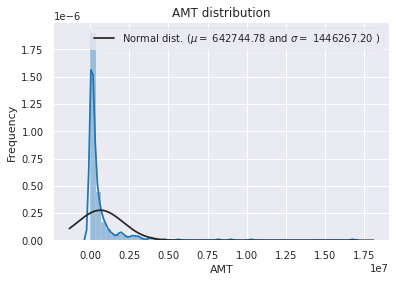

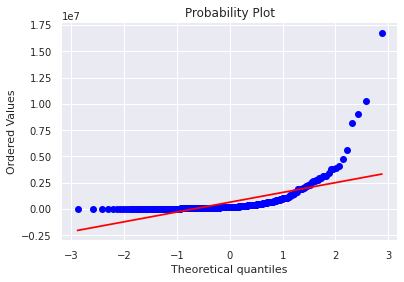

In [ ]:
sns.distplot(y_train , fit=norm);
(mu, sigma) = norm.fit(y_train)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('AMT distribution')

fig = plt.figure()
res = stats.probplot(y_train, plot=plt)
plt.show()

- 위 결과가 말해주듯이 타겟변수를 정규화 하는 작업이 필요합니다.
- 정규화 작업은 1줄이면 가능합니다.


 mu = 12.22 and sigma = 1.52



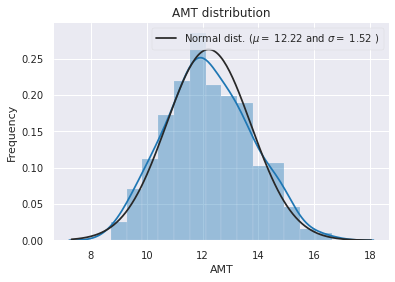

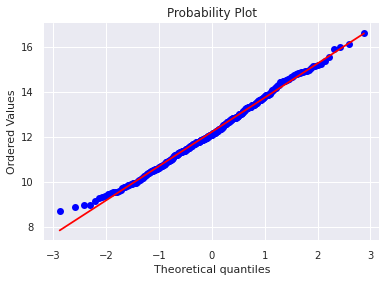

In [ ]:
y_train = np.log1p(y_train)

sns.distplot(y_train , fit=norm);
(mu, sigma) = norm.fit(y_train)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('AMT distribution')

fig = plt.figure()
res = stats.probplot(y_train, plot=plt)
plt.show()

# 교차검증 및 하이퍼 파라미터 튜닝
- 본 장에서는 교차검증을 실시하는 목적과 파라미터 튜닝에 대해 배울 것이다.

## (1) 교차검증의 목적
- 가장 중요한 목적은 과적합(Overfitting)을 방지하기 위해서다.
- 과적합은 무엇인가?
 - 가령, 교고서 범위 내의 있는 문제는 잘 풀지만, 모의고사 또는 수능처럼 약간   응용된 문제가 나오면 잘 풀지 못하는 것과 유사하다.
 - 즉, 고정된 학습데이터와 테스트 데이터로 평가 하다 보니, 테스트 데이터에만  최적의 성능을 발휘할 수 있도록 편향되게 모델이 학습하게 되는 현상을 말한다.
 - 이러한 문제점을 개선하기 위해 교차 검증을 이용해 더 다양한 학습과 평가를 한다.
 - 즉, 본 게임에 앞서서 여러번의 사전 모의평가를 진행하는 것과 유사하다.

## (2) K폴드 교차 검증
- K개의 데이터 세트를 만들고, 검증 평가를 반복적으로 수행하는 방법이다.
- 이 때, 5개의 평가를 평균한 결과를 가지고 예측 성능을 평가한다.
- 아래 그림을 보자.

- 기존 처럼, 훈련/테스트 데이터로 분리 한다.
- 그리고, 해당 모델을 처음에 분할하였던 Test Set을 활용하여 평가 한다.
- 층화추출 K폴드도 있다. 데이터의 분포가 불균형을 이룰 때 적용하면 모형의 예측 성능보다는 보다 안정성 있게 모델이 만들어질 수 있다.
 - 참조: Stratified Sampling

## (3) RMSLE 성능 평가 방법
- 회귀 모형의 대표적인 평가 지표이다.
 - RMSLE: Root Mean Square Log Error는 기존 RMSE에 로그를 적용해준 지표다.
- 아쉽게도 sklearn에는 해당 옵션이 제공되지 않기 때문에 RMSLE를 수행하는 성능 평가 함수를 직접 만들어 본다.
- log값 변환 시 NaN등의 이슈로 log가 아닌 log1p()를 이용해 계산한다.
- 이 때, log1p()로 변환된 값은 np.expm1() 함수로 쉽게 원래의 스케일로 복원될 수 있다.

In [ ]:
def rmsle(y, pred): 
  log_y = np.log1p(y)
  log_pred = np.log1p(pred)
  squared_error = (log_y - log_pred)**2
  rmsle = np.sqrt(np.mean(squared_error))
  return print('Test Data RMSLE: {0:.3f}'.format(rmsle))

## (4) 하이퍼 파라미터 및 튜닝
- 1차적으로 모형은 GBM만 사용한다.

- 이 때, 보통 모형 알고리즘에 대한 하이퍼 파라미터 튜닝도 같이 진행하게 된다.

 - n_estimators: weak learner가 순차적으로 오류를 보정함. 개수가 많아지면 성능이 좋아지지만, 수행시간이 오래 발생될 수 있음.
 - learning_rate: 오차를 얼마나 강하게 보정할 것인지 제어
 - max_depth: 복잡도를 너무 높이지 말고 트리의 깊이가 정해진 숫자보다 깊어지지 않게 함.
 - min_samples_leaf: Leaf Node가 되기 위한 최소 샘플 개수
 - loss: huber, 이상치에 민감하지 않도록 보정해주는 함수.
 - max_features: 다차원 독립 변수 중 선택할 차원의 수를 의미함
- 이 때, 보통 최적의 하이퍼 파라미터 튜닝을 위해 값을 조정해서 알고리즘의 예측 성능을 개선한다고 했다.

- GridSearchCV와 RandomizedSearchCV로 구분되는데, 이 부분에 대한 설명은 다음 Chapter에서 진행하도록 한다.

 - 간단하게 설명하면, 파라미터를 순차적으로 변경하면서 최고의 성능을 가지는 파라미터 조합을 찾는 과정이다.

## (5) 세 모델 교차검증
- 지금까지 설명한 내용을 코드로 작성한다.
- 이 때, 최적의 파라미터를 찾기 위한 과정도 추가했다.
- 이제 두개의 모형을 만들어야 한다.
 - 이런 경우에는 모형 선언, 파라미터 지정, 교차검증 수행, 모형 평가 등을 모두 담을 수 있도록 함수화 해야 하는 코드를 작성한다.

## (6) 모형 선언 및 학습

In [ ]:
# 교차검증 수행
def get_best_params_model(model, params):
  cv_model = GridSearchCV(model, param_grid=params, scoring="neg_mean_squared_error", cv = 5)
  cv_model.fit(X_train, y_train)
  print("----", model.__class__.__name__, "----")
  print("GridSearchCV 최적 하이퍼 파라미터 :", cv_model.best_params_)

  rmse = np.sqrt(-1*cv_model.best_score_)
  print("GridSearchCV 최적 평균 RMSE값 :", np.round(rmse, 3))

  eval_pred = cv_model.predict(X_test)
  eval_pred = np.expm1(eval_pred)
  rmsle(y_test, eval_pred)
  
  return cv_model.best_estimator_

In [ ]:
from sklearn.linear_model import LinearRegression

# 4개의 모델 선언
xgb = XGBRegressor(random_state=0)
gbm = GradientBoostingRegressor(random_state=0)
lgb = LGBMRegressor(random_state=0)  

params = {'n_estimators': [1000, 2000]}

models = [xgb, gbm, lgb] # 모형 하나 추가 함
best_models = []
for model in models:
  new_model = get_best_params_model(model=model, params=params)
  best_models.append(new_model)

[02:37:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:37:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:37:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:37:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:37:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:37:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:37:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:37:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

- 실제 테스트 데이터 셋 모형을 평가한 결과 세 모형을 비교한 결과 각각 []의 값이 나왔다.
- 그러나, 위 평가모형 결과가 실제와 똑같을 거라 생각하면 안된다.
- 다만, 최종 제출폼을 작성하기에 앞서서, 중간에 평가 측정표를 검증하여 마지막 모형을 선정하는 중간 지표로 삼기에는 적절하다.
- 이번에는 stacking model을 사용해야 하기 때문에, 관련 코드를 추가로 작성한다.

## (7) 스태킹 알고리즘 테스트
- 실제 스태킹 알고리즘 테스트를 진행해서, 성능의 차이를 확인해본다.

In [ ]:
# 모형 불러오기
xgb_reg = best_models[0]
gbm_reg = best_models[1]
lgb_reg = best_models[2]

# 예측 데이터 세트
xgb_pred = xgb_reg.predict(X_test)
xgb_pred = np.expm1(xgb_pred)

gbm_pred = gbm_reg.predict(X_test)
gbm_pred = np.expm1(gbm_pred)

lgb_pred = lgb_reg.predict(X_test)
lgb_pred = np.expm1(lgb_pred)

pred = np.array([xgb_pred, gbm_pred, lgb_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환
pred = np.transpose(pred)
print(pred.shape)

(3, 149)
(149, 3)


- 이렇게 예측 데이터로 생성된 데이터 세트를 기반으로 최종 메타 모델을 만든다.

In [ ]:
final = xgb_pred*0.40 + gbm_pred*0.40 + lgb_pred*0.20
rmsle(y_test, final)

Test Data RMSLE: 1.444


- 위 기준으로 봤을 때는 기존 성능보다 RMSLE기준 보다 성능이 조금 향상되는 것을 확인 할 수 있었다.
- 그러나, 실제로는 어떻게 될지 모르기에 위 코드를 다시한번 적용해보는 코드를 구성해본다.
- 위 작성된 코드를 그대로 사용할 것이다.

## (8) 예측 템플릿 작성
- 예측 템플릿을 작성한다.

In [ ]:
from itertools import product

# 예측 템플릿 만들기
CARD_SIDO_NMs = df_num['CARD_SIDO_NM'].unique()
STD_CLSS_NMs  = df_num['STD_CLSS_NM'].unique()
HOM_SIDO_NMs  = df_num['HOM_SIDO_NM'].unique()
AGEs          = df_num['AGE'].unique()
SEX_CTGO_CDs  = df_num['SEX_CTGO_CD'].unique()
FLCs          = df_num['FLC'].unique()
years         = [2020]
months        = [4, 7]

comb_list = [CARD_SIDO_NMs, STD_CLSS_NMs,HOM_SIDO_NMs, AGEs, SEX_CTGO_CDs, FLCs, years, months]
temp = np.array(list(product(*comb_list)))

train_features = df_num.drop(['CSTMR_CNT', 'AMT', 'CNT'], axis=1)
temp = pd.DataFrame(data=temp, columns=train_features.columns)

In [ ]:
# 예측 데이터 세트
xgb_pred = xgb_reg.predict(temp)
xgb_pred = np.expm1(xgb_pred)

gbm_pred = gbm_reg.predict(temp)
gbm_pred = np.expm1(gbm_pred)

lgb_pred = lgb_reg.predict(temp)
lgb_pred = np.expm1(lgb_pred)

In [ ]:
final = xgb_pred*0.40 + gbm_pred*0.40 + lgb_pred*0.20

temp['AMT'] = np.round(final, 0)
temp['REG_YYMM'] = temp['year']*100 + temp['month']
temp = temp[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
temp = temp.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index(drop=False)

- 라벨 인코딩 했던 부분을 제출을 위해 다시 디코딩하는 작업을 진행한다.

In [ ]:
# 디코딩 
temp['CARD_SIDO_NM'] = encoders['CARD_SIDO_NM'].inverse_transform(temp['CARD_SIDO_NM'])
temp['STD_CLSS_NM'] = encoders['STD_CLSS_NM'].inverse_transform(temp['STD_CLSS_NM'])

In [ ]:
print(temp.head())

   REG_YYMM CARD_SIDO_NM        STD_CLSS_NM        AMT
0    202004           강원            골프장 운영업  1582703.0
1    202004           강원        과실 및 채소 소매업  1843834.0
2    202004           강원  관광 민예품 및 선물용품 소매업  1841467.0
3    202004           강원       그외 기타 종합 소매업  1751187.0
4    202004           강원       기타 대형 종합 소매업  3075192.0


## (9) Submission 파일 작업 및 내보내기

In [ ]:
submission = client.query('''
  SELECT 
    * 
  FROM `jeju-analy.jeju_data_ver1.submission` 
  ''').to_dataframe()

In [ ]:
submission = submission.drop(['AMT'], axis=1)
submission = submission.merge(temp, left_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], right_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], how='left')
submission['AMT'] = submission['AMT'].fillna(0)
print(submission.head())

   id  REG_YYMM CARD_SIDO_NM           STD_CLSS_NM        AMT
0   0    202004           강원            건강보조식품 소매업        0.0
1   1    202004           강원               골프장 운영업  1582703.0
2   2    202004           강원           과실 및 채소 소매업  1843834.0
3   3    202004           강원     관광 민예품 및 선물용품 소매업  1841467.0
4   4    202004           강원  그외 기타 분류안된 오락관련 서비스업        0.0


In [ ]:
submission.to_csv('submission.csv', encoding='utf-8-sig', index=False)